In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df= pd.read_csv('/kaggle/input/rockfall-detection-on-moon/moon/train_labels/train_labels_m.csv')

In [ ]:
df1 = df.dropna()

In [ ]:
df1['IMAGE_ID'].size

1000

In [ ]:
duplicate= df1[df1.duplicated(['IMAGE_ID'], keep=False)]

In [ ]:
duplicate['IMAGE_ID']

1       10.tif
2       10.tif
3       11.tif
4       11.tif
5       11.tif
        ...   
992    356.tif
996    360.tif
997    360.tif
998    360.tif
999    360.tif
Name: IMAGE_ID, Length: 863, dtype: object

In [ ]:
nonDuplicates=df1[~df1.duplicated('IMAGE_ID')]

In [ ]:
duplicate[duplicate.eq(212).any(1)]

,IMAGE_ID,X1,Y1,X2,Y2,label
158,76.tif,285.0,212.0,358.0,310.0,rockfall
268,104.tif,298.0,212.0,348.0,312.0,rockfall
345,138.tif,514.0,212.0,640.0,255.0,rockfall
697,246.tif,385.0,132.0,467.0,212.0,rockfall
699,247.tif,212.0,570.0,283.0,662.0,rockfall
947,340.tif,724.0,112.0,757.0,212.0,rockfall


In [ ]:
import glob
import os
import re
rain_image = []
trainImages=[]
pathOfDuplicatedImages=[]
path = "/kaggle/input/rockfall-detection-on-moon/moon/train_images"
dupList=duplicate['IMAGE_ID']
suff='.tif';
# print(dupList)
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
#         y=re.findall('[0-9]+', filename)
        if((duplicate['IMAGE_ID'].eq(filename)).any()):
            pathOfDuplicatedImages.append(os.path.join(dirname, filename))

In [ ]:
copyDic={}
for key in dupList:
    if key in dupList.keys():
         copyDic[re.findall('[0-9]+',key)] += 1
    else:
        copyDic[key] = 1
print(copyDic)

{'10.tif': 1, '11.tif': 1, '19.tif': 1, '24.tif': 1, '27.tif': 1, '28.tif': 1, '29.tif': 1, '30.tif': 1, '31.tif': 1, '32.tif': 1, '33.tif': 1, '34.tif': 1, '36.tif': 1, '37.tif': 1, '4.tif': 1, '43.tif': 1, '44.tif': 1, '49.tif': 1, '5.tif': 1, '8.tif': 1, '9.tif': 1, '100.tif': 1, '52.tif': 1, '54.tif': 1, '58.tif': 1, '59.tif': 1, '61.tif': 1, '62.tif': 1, '63.tif': 1, '64.tif': 1, '65.tif': 1, '66.tif': 1, '70.tif': 1, '71.tif': 1, '72.tif': 1, '73.tif': 1, '75.tif': 1, '76.tif': 1, '77.tif': 1, '78.tif': 1, '82.tif': 1, '83.tif': 1, '84.tif': 1, '85.tif': 1, '87.tif': 1, '89.tif': 1, '93.tif': 1, '94.tif': 1, '95.tif': 1, '96.tif': 1, '97.tif': 1, '98.tif': 1, '99.tif': 1, '102.tif': 1, '103.tif': 1, '104.tif': 1, '105.tif': 1, '108.tif': 1, '110.tif': 1, '112.tif': 1, '113.tif': 1, '114.tif': 1, '117.tif': 1, '118.tif': 1, '119.tif': 1, '120.tif': 1, '122.tif': 1, '123.tif': 1, '124.tif': 1, '127.tif': 1, '128.tif': 1, '132.tif': 1, '133.tif': 1, '134.tif': 1, '138.tif': 1, '141.

In [ ]:

#     img = cv2.imread(file)

#         print()

#     train_image.append(img)
# train_df = np.array(train_image)
# train_df.shape

In [ ]:
# for i in range(100):
# shutil.copy('pic.png', 'pic' + str(i) + '.png')

In [ ]:
import shutil
# for i in pathOfDuplicatedImages:

# tem ='copy'
# shutil.copy(pathOfDuplicatedImages[0],path)

In [ ]:
from collections import Counter
counts = dict(Counter(duplicate['IMAGE_ID']))
duplicatesImg = {key:value for key, value in counts.items() if value > 1}
print(duplicatesImg)

{'10.tif': 2, '11.tif': 4, '19.tif': 2, '24.tif': 2, '27.tif': 2, '28.tif': 2, '29.tif': 8, '30.tif': 2, '31.tif': 4, '32.tif': 6, '33.tif': 4, '34.tif': 4, '36.tif': 3, '37.tif': 3, '4.tif': 3, '43.tif': 2, '44.tif': 2, '49.tif': 2, '5.tif': 2, '8.tif': 3, '9.tif': 3, '100.tif': 10, '52.tif': 2, '54.tif': 2, '58.tif': 5, '59.tif': 3, '61.tif': 6, '62.tif': 3, '63.tif': 3, '64.tif': 3, '65.tif': 4, '66.tif': 4, '70.tif': 3, '71.tif': 3, '72.tif': 2, '73.tif': 2, '75.tif': 2, '76.tif': 4, '77.tif': 5, '78.tif': 3, '82.tif': 5, '83.tif': 8, '84.tif': 8, '85.tif': 4, '87.tif': 3, '89.tif': 2, '93.tif': 2, '94.tif': 9, '95.tif': 5, '96.tif': 3, '97.tif': 2, '98.tif': 20, '99.tif': 15, '102.tif': 2, '103.tif': 4, '104.tif': 2, '105.tif': 2, '108.tif': 2, '110.tif': 2, '112.tif': 5, '113.tif': 4, '114.tif': 2, '117.tif': 2, '118.tif': 2, '119.tif': 6, '120.tif': 4, '122.tif': 3, '123.tif': 3, '124.tif': 4, '127.tif': 3, '128.tif': 3, '132.tif': 5, '133.tif': 4, '134.tif': 4, '138.tif': 2, '1

In [ ]:
duplicatesImg.get('11.tif')

4

In [ ]:
pathOfDuplicatedImages[0].split('/')

['',
 'kaggle',
 'input',
 'rockfall-detection-on-moon',
 'moon',
 'train_images',
 '274.tif']

In [ ]:
# removoing dir

# shutil.rmtree("/kaggle/working/x_label")
 #make dir
os.makedirs('/kaggle/working/x_label')

In [ ]:
import shutil
path='/kaggle/working/x_label/'
suff='copy'
subsuff='_'
for i in pathOfDuplicatedImages:
    x=i.split('/')
    for j in duplicatesImg.keys():
        if(x[6]==j):
            y=duplicatesImg.get(j)
            for k in range(1,y+1):
                shutil.copy(i,f'{path}{suff}{k}{subsuff}{x[6]}')


In [ ]:
#for removing contents of output dir
# for dirname, _, filenames in os.walk('/kaggle/working/'):
#     for filename in filenames:
#         os.remove(filename)

In [ ]:
nonDuplicates['IMAGE_ID']

0        1.tif
1       10.tif
3       11.tif
7       12.tif
8       13.tif
        ...   
990    356.tif
993    357.tif
994    358.tif
995    359.tif
996    360.tif
Name: IMAGE_ID, Length: 349, dtype: object

In [ ]:
duplicate['IMAGE_ID']

1       10.tif
2       10.tif
3       11.tif
4       11.tif
5       11.tif
        ...   
992    356.tif
996    360.tif
997    360.tif
998    360.tif
999    360.tif
Name: IMAGE_ID, Length: 863, dtype: object

In [ ]:
newdf1=df1[df1-df1.duplicated('IMAGE_ID')]

In [ ]:
nonDuplicates['IMAGE_ID'].size

349

In [ ]:
newdf1

,IMAGE_ID,X1,Y1,X2,Y2,label
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
temp=[]
for i in nonDuplicates['IMAGE_ID']:
    if(~(duplicate['IMAGE_ID'].eq(i)).any()):
        temp.append(i)

In [ ]:
pathOfnonDuplicatedImages=[]
nonDupPath='/kaggle/input/rockfall-detection-on-moon/moon/train_images/'
for dirname, _, filenames in os.walk(nonDupPath):
    for filename in filenames:
        if(filename in temp):
            pathOfnonDuplicatedImages.append(os.path.join(dirname, filename))

len(pathOfnonDuplicatedImages)

137

In [ ]:
basePath='/kaggle/working/x_label/'
suff='copy'
subsuff='_'
k=0
for i in pathOfnonDuplicatedImages:
    x=i.split('/')
#     print(f'{path}{suff}{k}{subsuff}{x[6]}')
    shutil.copy(i,f'{path}{suff}{k}{subsuff}{x[6]}')

In [ ]:
# os.makedirs('/kaggle/working/y_label')

# df1.to_csv('/kaggle/working/y_label/y_label.csv')

In [ ]:
df1

,IMAGE_ID,X1,Y1,X2,Y2,label
0,1.tif,148.0,40.0,183.0,125.0,rockfall
1,10.tif,214.0,159.0,287.0,209.0,rockfall
2,10.tif,553.0,192.0,596.0,229.0,rockfall
3,11.tif,418.0,58.0,452.0,88.0,rockfall
4,11.tif,421.0,141.0,468.0,182.0,rockfall
...,...,...,...,...,...,...
995,359.tif,237.0,185.0,268.0,272.0,rockfall
996,360.tif,123.0,291.0,158.0,371.0,rockfall
997,360.tif,203.0,196.0,264.0,282.0,rockfall
998,360.tif,272.0,67.0,310.0,141.0,rockfall


In [ ]:
IMAGE_DIR='/kaggle/working/x_label'
# ANNOT_DIR='/kaggle/working/y_label/'
# listdir generates a list of all the files in the directory and return a python list of string file names
images_name_list = os.listdir(IMAGE_DIR)
# annots_name_list = df1.to_list()

In [ ]:
os.makedirs('/kaggle/working/y_label/')

In [ ]:
a=df1.to_csv()


In [ ]:

os.chdir(r'/kaggle/working/y_label')


In [ ]:

df1.to_csv(r'y_label.csv')

In [ ]:
path = '/kaggle/working/y_label/'
csv_files = glob.glob(os.path.join(path,"a.csv"))

In [ ]:
image_id=df1['IMAGE_ID'].to_list()

In [ ]:
len(image_id)

1000

In [ ]:
temp=[]
temp = sorted(image_id)

In [ ]:
from skimage import io

In [ ]:
import cv2
# img_path=[]
# x=[]
# for img_name in image_id:
#     for dirname, _, filenames in os.walk(Img_Path):
#         for filename in filenames:
#     # joining path to image dir to image name to get the full path to the image
#     img_path.append(os.path.join(IMAGE_DIR, img_name))
#     x=os.path.join(IMAGE_DIR, img_name)
#     image= io.imread(x)
#     image=cv2.resize(image,(200, 200),interpolation = cv2.INTER_AREA)
#     image=np.array(image)
#     image = image.astype('float32')
#     image /= 255
#     X.append(image)

    # appending all the images to X, one by one

X=[]
temp=[]
Img_Path='/kaggle/working/x_label'
prefix='copy1_'
prefix1='copy0_'
for dirname, _, filenames in os.walk(Img_Path):
        for i in image_id:
            try:
                x=(os.path.join(dirname,f'{prefix1}{i}'))
                image= io.imread(x)
            except:
                x=(os.path.join(dirname,f'{prefix}{i}'))
                image= io.imread(x)
            image=cv2.resize(image,(200, 200),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            X.append(image)



In [ ]:
len(X)

1000

In [ ]:
X_dash=np.asarray(X, dtype = np.float32)

In [ ]:
print('X_shape before reshaping',X_dash.shape)

X_shape before reshaping (1000, 200, 200)


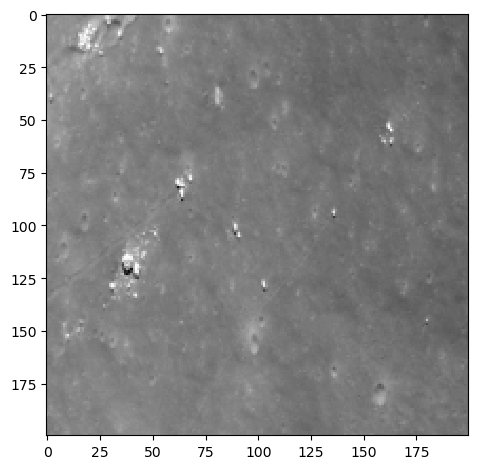

In [ ]:
io.imshow(X_dash[1])

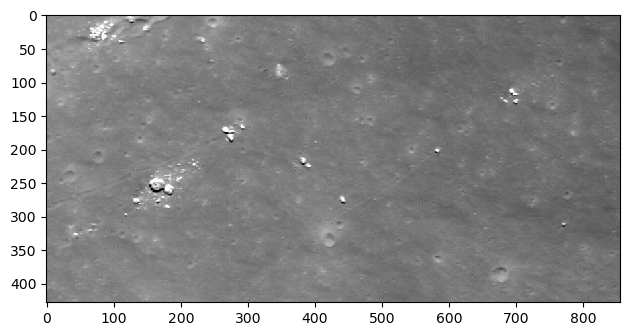

In [ ]:
io.imshow('/kaggle/input/rockfall-detection-on-moon/moon/train_images/10.tif')

In [ ]:
image_id_y=[]
for i in image_id:
    a=i.split('.')
    image_id_y.append(a[0])
image_id_y = np.array(image_id_y).astype(np.float32)

In [ ]:
len(image_id_y)

1000

In [ ]:
co_ords=['X1','Y1','X2','Y2']
df2=df1[co_ords]

In [ ]:
y_dash= np.asarray(df2, dtype = np.float32)

In [ ]:
y_dash.shape

(1000, 4)

In [ ]:
y_dash[0]

array([148.,  40., 183., 125.], dtype=float32)

In [ ]:
xmin=148
ymin=40
xmax=183
ymax=125

In [ ]:
w= xmax-xmin
h=ymax-ymin
# Image_Width=200
# Image_Height=200

In [ ]:
n_w=w/200
n_h=h/200

In [ ]:
n_xmin= (xmin+w/2)/200
n_xmax= (xmax+w/2)/200
n_ymin=(ymin+w/2)/200
n_ymax= (ymax+w/2)/200

In [ ]:
xmin=xmin/200
ymin=ymin/200
xmax=xmax/200
ymax=ymax/200

In [ ]:
new_xmin= (xmin+n_w/2)/200
new_xmax=(xmax+n_w)/200
new_ymin=(ymin+n_h)/200
new_ymax=(ymax+n_h)/200

In [ ]:
print(new_xmin*200)
print(new_xmax*200)
print(new_ymin*200)
print(new_ymax*200)

0.8274999999999999
1.09
0.625
1.05


In [ ]:
n_w=n_w*200
print(n_w)

35.0


In [ ]:
n_h=n_h*200


In [ ]:
print(n_h)

85.0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

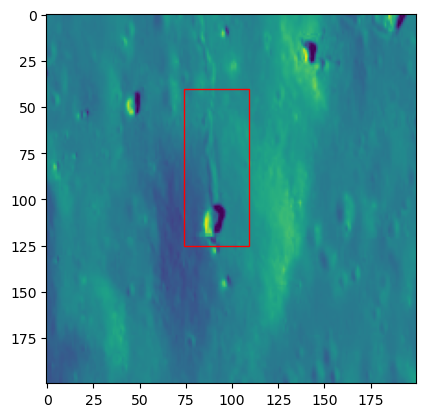

In [ ]:
rect = patches.Rectangle((74, 40),n_w, n_h, linewidth=1, edgecolor='r', facecolor='none')
fig, ax = plt.subplots()

# Display the image
ax.imshow(X_dash[0])
ax.add_patch(rect)
plt.show()

In [ ]:
y_dash[1]

array([214., 159., 287., 209.], dtype=float32)

In [ ]:
df1.head

<bound method NDFrame.head of     IMAGE_ID     X1     Y1     X2     Y2     label
0      1.tif  148.0   40.0  183.0  125.0  rockfall
1     10.tif  214.0  159.0  287.0  209.0  rockfall
2     10.tif  553.0  192.0  596.0  229.0  rockfall
3     11.tif  418.0   58.0  452.0   88.0  rockfall
4     11.tif  421.0  141.0  468.0  182.0  rockfall
..       ...    ...    ...    ...    ...       ...
995  359.tif  237.0  185.0  268.0  272.0  rockfall
996  360.tif  123.0  291.0  158.0  371.0  rockfall
997  360.tif  203.0  196.0  264.0  282.0  rockfall
998  360.tif  272.0   67.0  310.0  141.0  rockfall
999  360.tif  354.0  140.0  406.0  206.0  rockfall

[1000 rows x 6 columns]>

In [ ]:
iii=io.imread('/kaggle/input/rockfall-detection-on-moon/moon/train_images/10.tif')
iii.shape

(428, 855)

In [ ]:
xmax=596/428
xmin=553/428
ymin=192/855
ymax=229/855

In [ ]:
print(xmin*200)

258.41121495327104


In [ ]:
n_xmax=xmax*200
n_min=xmin*200

In [ ]:
n_ymax=ymax*200
n_ymin=ymin*200

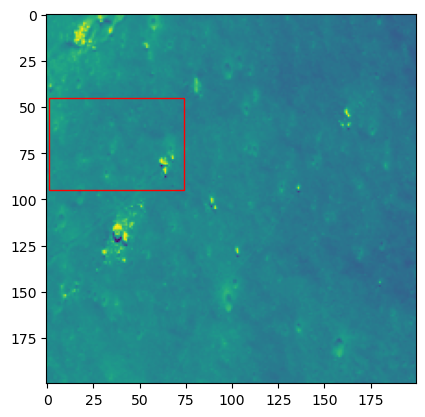

In [ ]:
import matplotlib.pyplot as plt
rect = patches.Rectangle((n_xmin, n_ymin),73,50 , linewidth=1, edgecolor='r', facecolor='none')
fig, ax = plt.subplots()

# Display the image
ax.imshow(X_dash[1])
ax.add_patch(rect)
plt.show()

In [ ]:
'''Convert the annotation data to a normalized coordinate system: The annotation data is typically represented as a set of coordinates that specify the position of the object within the image. You should normalize these coordinates so that they are relative to the size of the image. For example, if your original image was 800x600 and your object was located at (400,300), you would convert this to (0.5, 0.5) in normalized coordinates.

Scale the normalized coordinates: Once you have converted your annotation data to a normalized coordinate system, you can scale it to match the size of your normalized image. In this case, you would multiply the normalized coordinates by the new image size of 200x200.'''

'Convert the annotation data to a normalized coordinate system: The annotation data is typically represented as a set of coordinates that specify the position of the object within the image. You should normalize these coordinates so that they are relative to the size of the image. For example, if your original image was 800x600 and your object was located at (400,300), you would convert this to (0.5, 0.5) in normalized coordinates.\n\nScale the normalized coordinates: Once you have converted your annotation data to a normalized coordinate system, you can scale it to match the size of your normalized image. In this case, you would multiply the normalized coordinates by the new image size of 200x200.'

In [ ]:
corodsList=sorted(pathOfDuplicatedImages)

In [ ]:
a=list(df1["IMAGE_ID"])

In [ ]:
a=sorted(a)

In [ ]:
pa = '/kaggle/input/rockfall-detection-on-moon/moon/train_images/*.*'
dic={}
for i in glob.glob(pa):
    numbers = re.findall('[0-9]+', i)
    img = io.imread(i)
    shape=img.shape
    dic.update({numbers[0]:shape})

In [ ]:
dic.get('12')

(428, 741)

In [ ]:
df1.head

<bound method NDFrame.head of     IMAGE_ID     X1     Y1     X2     Y2     label
0      1.tif  148.0   40.0  183.0  125.0  rockfall
1     10.tif  214.0  159.0  287.0  209.0  rockfall
2     10.tif  553.0  192.0  596.0  229.0  rockfall
3     11.tif  418.0   58.0  452.0   88.0  rockfall
4     11.tif  421.0  141.0  468.0  182.0  rockfall
..       ...    ...    ...    ...    ...       ...
995  359.tif  237.0  185.0  268.0  272.0  rockfall
996  360.tif  123.0  291.0  158.0  371.0  rockfall
997  360.tif  203.0  196.0  264.0  282.0  rockfall
998  360.tif  272.0   67.0  310.0  141.0  rockfall
999  360.tif  354.0  140.0  406.0  206.0  rockfall

[1000 rows x 6 columns]>

In [ ]:

x1List=[]
y1List=[]
x2List=[]
y2List=[]
for i in range(0,df1['IMAGE_ID'].size):
    x1=(df1.loc[i]['X1'])
    y1=(df1.loc[i]['Y1'])
    x2=(df1.loc[i]['X2'])
    y2=(df1.loc[i]['Y2'])
    dic_id=(df1.loc[i]['IMAGE_ID'])
    temp_id=dic_id.split('.')
    shapeList=dic.get(temp_id[0])
#     print(f'{x1}","{x2}","{y1}","{y2}')
#     print(shapeList)
    x1=x1/shapeList[0]
    x2=x2/shapeList[0]
    x1List.append(x1*200)
    x2List.append(x2*200)
    y1=y1/shapeList[1]
    y2=y2/shapeList[1]
    y1List.append(y1*200)
    y2List.append(y2*200)
#     print(f'{x1}","{x2}","{y1}","{y2}')


In [ ]:
normalizedCo_ords= pd.DataFrame(columns=['Xmin','Ymin','Xmax','Ymax'])


In [ ]:
xmin_nor= pd.Series(x1List)
xmax_nor= pd.Series(x2List)
ymin_nor= pd.Series(y1List)
ymax_nor= pd.Series(y2List)

In [ ]:
normalizedCo_ords['Xmin']=x1List
normalizedCo_ords['Xmax']=x2List
normalizedCo_ords['Ymin']=y1List
normalizedCo_ords['Ymax']=y2List

In [ ]:
normalizedCo_ords

,Xmin,Ymin,Xmax,Ymax
0,160.000000,21.680217,197.837838,67.750678
1,100.000000,37.192982,134.112150,48.888889
2,258.411215,44.912281,278.504673,53.567251
3,195.327103,13.567251,211.214953,20.584795
4,196.728972,32.982456,218.691589,42.573099
...,...,...,...,...
995,110.747664,41.855204,125.233645,61.538462
996,57.476636,65.837104,73.831776,83.936652
997,94.859813,44.343891,123.364486,63.800905
998,127.102804,15.158371,144.859813,31.900452


In [ ]:
y_dash=normalizedCo_ords

In [ ]:
y_dash.shape

(1000, 4)

In [ ]:
X_dash.shape

(1000, 200, 200)

****Modeling****

In [ ]:
import tensorflow as tf
y_tensor=tf.convert_to_tensor(df2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_dash,y_dash,random_state=104, test_size=0.25,shuffle=True)

In [ ]:
X_train.shape

(750, 200, 200)

In [ ]:
y_train.shape

(750, 4)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
model = Sequential()
model.add(Conv2D(1024, (3, 3), activation='relu', input_shape=(200, 200,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(4, activation = "softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 1024)    10240     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 1024)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 512)       4719104   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 512)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 256)       1179904   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 256)      0

In [ ]:
model.compile(optimizer='adam',
              loss = "mse",
              metrics=['accuracy'])

In [ ]:
sxi'-=
history = model.fit(X_train, y_train, epochs=4, batch_size = 4)

SyntaxError: EOL while scanning string literal (2900660560.py, line 1)

In [ ]:
# history=model.fit(tf.stack(X_train),tf.stack(y_train),verbose =0 ,epochs=30,batch_size = 4)

In [ ]:
# history = model.fit(tf.stack(X_train), y_train_1, epochs=30, batch_size = 4)